In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv('data_eda.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,Employer_Provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Researc,NM,0,48,1,0,0,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical Syste,MD,0,37,1,0,0,0,0,data scientist,na,4828,0


In [5]:
# 1.choose relevant columns
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','Employer_Provided',
             'job_state','same_state','age','python_yn','spark_yn','aws_yn','excel_yn','job_simp','seniority','desc_len']]

In [6]:
df_model.shape

(742, 20)

In [7]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [8]:
df_dum.shape

(742, 178)

In [9]:
df_dum.head(4)

,avg_salary,Rating,num_comp,hourly,Employer_Provided,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_AL,job_state_AZ,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_MI,job_state_MN,job_state_MO,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_OH,job_state_OR,job_state_P

In [10]:
# train test split 
from sklearn.model_selection import train_test_split

In [11]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [12]:
X.shape

(742, 177)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(593, 177)

In [15]:
X_test.shape

(149, 177)

In [16]:
# multiple linear regression 
import statsmodels.api as sm

In [17]:
#here doing it on all data
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.55e-94
Time:                        08:44:24   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7569.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.9130      6.385      6.721      0.000      30.374      55.452
Rating                                                3.6547      1.933      1.891      0.059      -0.141       7.450
num_comp                                              2.2543      0.869      2.594      0.010       0.548       3.961
hourly                                              -36.4948      9.192     -3.970      0.000     -54.546     -18.443
Employer_Provided                                    31.6473     11.510      2.750      0.006       9.043      54.252
same_state                                            2.4903      2.619      0.951      0.342      -2.653       7.634
age                                                   0.0342      0.030      1.134      0.257      -0.025       0.093
python_yn                                             8.1510      2.524      3.230      0.001       3.194      13.108
spark_yn                                             -0.5551      2.921     -0.190      0.849      -6.291       5.181
aws_yn                                                1.1240      2.737      0.411      0.681      -4.251       6.499
excel_yn                                             -0.4024      2.270     -0.177      0.859      -4.860       4.055
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.5663      8.631      1.572      0.117      -3.384      30.516
Size_1 to 50 employees                                0.9726      6.489      0.150      0.881     -11.771      13.716
Size_10000+ employees                                -2.9428      5.798     -0.508      0.612     -14.330       8.445
Size_1001 to 5000 employees                           6.0729      3.876      1.567      0.118      -1.539      13.685
Size_201 to 500 employees                             2.1753      3.867      0.562      0.574      -5.420       9.770
Size_5001 to 10000 employees                         -3.9263      5.441     -0.722      0.471     -14.612       6.759
Size_501 to 1000 employees                            2.0145      4.048      0.498      0.619      -5.936       9.965
Size_51 to 200 employees                              4.0590      4.405      0.921      0.357      -4.592      12.710
Size_Unknown                                         20.9216     14.009      1.493      0.136      -6.591      48.434
Type of ownership_-1                                 13.5663      8.631      1.572      0.117      -3.384      30.516
Type of ownership_College / University                6.1653     17.729      0.348      0.728     -28.652      40.983
Type of ownersh

In [18]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

In [19]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-37254859.2620341

In [21]:
# lasso regression
#can tune the value of alpha to get better results
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train, y_train)

Lasso(alpha=0.13)

In [22]:
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.259259315934827

In [23]:
#now will loop through diff value of alpha(.1 to 10) n see cross val score

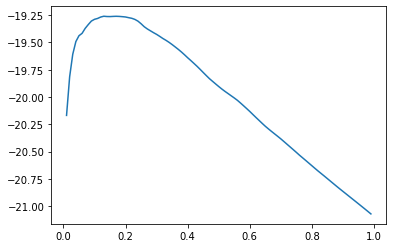

In [24]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

plt.plot(alpha,error)

In [25]:
err = tuple(zip(alpha,error))
err

((0.01, -20.168482836147337),
 (0.02, -19.814061065359898),
 (0.03, -19.607629951301472),
 (0.04, -19.49163082648518),
 (0.05, -19.43787017777927),
 (0.06, -19.41611547667715),
 (0.07, -19.37054950771729),
 (0.08, -19.335460501380602),
 (0.09, -19.30337013674418),
 (0.1, -19.287440452804155),
 (0.11, -19.279478019935997),
 (0.12, -19.266490107247293),
 (0.13, -19.259259315934827),
 (0.14, -19.261809211738665),
 (0.15, -19.262340400259827),
 (0.16, -19.26074013524652),
 (0.17, -19.259676340566543),
 (0.18, -19.260870501218154),
 (0.19, -19.263227814058453),
 (0.2, -19.266138458353527),
 (0.21, -19.27236827073358),
 (0.22, -19.278118079782598),
 (0.23, -19.28826327659383),
 (0.24, -19.30427590654647),
 (0.25, -19.328073930765957),
 (0.26, -19.35496586203329),
 (0.27, -19.37545051495064),
 (0.28, -19.392639584800275),
 (0.29, -19.409723956572538),
 (0.3, -19.42550250571872),
 (0.31, -19.443691567723324),
 (0.32, -19.462917861936084),
 (0.33, -19.479764033312154),
 (0.34, -19.4984033987481

In [26]:
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err

,alpha,error
0,0.01,-20.168483
1,0.02,-19.814061
2,0.03,-19.607630
3,0.04,-19.491631
4,0.05,-19.437870
...,...,...
94,0.95,-20.979113
95,0.96,-21.002104
96,0.97,-21.025095
97,0.98,-21.048348


In [27]:
df_err[df_err.error == max(df_err.error)]
#now we assign this value of alpha into our normal Lasso reg

,alpha,error
12,0.13,-19.259259


In [28]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [29]:
np.mean(cross_val_score(rf, X_train,y_train, scoring='neg_mean_absolute_error', cv= 3))

-15.082140140833033

In [ ]:
# rf.fit(X_train,y_train)
# y_pred = rf.predict(X_test)

In [30]:
# tune models GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,15,20], 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf , parameters , scoring='neg_mean_absolute_error' , cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [10, 15, 20]},
             scoring='neg_mean_absolute_error')

In [33]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=20)

In [35]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [37]:
#comparing all mse with their dv
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

7041902.198225015

In [38]:
mean_absolute_error(y_test,tpred_lml)

19.833865978927584

In [39]:
mean_absolute_error(y_test,tpred_rf)

10.928523489932886

In [41]:
#combinnig diff models n checking
# mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

In [42]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 35.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4644.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
